# Woordvectoren

Deze opdracht staat in het teken van *word vectors*. Zoals tijdens het theoretische deel is toegelicht, representeren we in *Natural Language Processing* (*NLP*) elk woord als een pan-dimensionale vector van getallen. Deze vector is gerelateerd aan de betekenis van het woord. Voor deze module voert het te ver om dergelijke [*embeddings*](https://en.wikipedia.org/wiki/Word_embedding) zelf uit te programmeren, dus maken we gebruik van al getrainde modellen. In het echte leven is het ook zeer ongebruikelijk om embeddings zelf te programmeren, omdat het veel tijd en energie kost en ze eenvoudig beschikbaar zijn.

In deze opgave gebruiken we *word embeddings* om de hoofdstad van een land te bepalen. We maken hierbij gebruik van de cosinusgelijkheid en de euclidische afstand, die beiden in het hoorcollege zijn toegelicht.

### importeren van de data en de libraries

Zoals gebruikelijk beginnen we met het imporeren van de noodzakelijke python-libraries en het laden van de dataset. Voor het gemak maken we weer gebruik van [een Pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/getting_started/dsintro.html) om dat data in op te slaan – een techniek die heel veel wordt gebruikt in machine-learning-projecten. 


In [1]:
# Run deze cel om de packages te laden.
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from utils import get_vectors

In [2]:
# Run deze cel om de data te laden.
data = pd.read_csv('data/capitals.txt', delimiter=' ')
data.columns = ['city1', 'country1', 'city2', 'country2']

# een beeld van de data
data.head(5) 

,city1,country1,city2,country2
0,Athens,Greece,Bangkok,Thailand
1,Athens,Greece,Beijing,China
2,Athens,Greece,Berlin,Germany
3,Athens,Greece,Bern,Switzerland
4,Athens,Greece,Cairo,Egypt


In de cel hieronder laden we de *word-embedding* die, zoals gezegd, vanuit een getraind model komt. Voor de volledigheid: deze embedding is een subset van [een project van Google](https://code.google.com/archive/p/word2vec/). In deze embedding zitten maar 243 woorden, maar voor deze opgave is dat prima. De woorden zijn opgeslagen als een python dictionary, waarvan de *key* het woord is en de *value* een driehonderd-dimensionale vector die de betekenis representeert.

In [3]:
word_embeddings = pickle.load(open("data/word_embeddings_subset.p", "rb"))
len(word_embeddings)  # 243

243

In [4]:
type(word_embeddings)

dict

In [5]:
print(f"grootte van de vector voor Berlijn: {word_embeddings['Berlin'].shape[0]}")

grootte van de vector voor Berlijn: 300


## Stap 1: Voorspellen van de relaties tussen woorden.

We gaan een functie maken die de gegeven *word embeddings* gebruikt om de relatie tussen woorden te voorspellen. Deze functie krijgt drie parameters: de eerste twee zijn op een bepaalde manier aan elkaar gerelateerd en de functie geeft een nieuw woord terug dat eenzelfde relatie heeft met het gegeven derde woord. Wanneer we bijvoorbeeld de functie aanroepen met `Athene`, `Griekenland` en `Bankok`, moet de functie `Thailand` teruggeven (Athene staat immers tot Griekenland als Bankok staat tot Thailand).

![uitleg van rekenen met woordvectoren](imgs/vectors.jpeg)

### 1.1 Cosinusgelijkheid

Om de functie te kunnen maken, moeten we de cosinusgelijkheid van twee vectoren kunnen bepalen. Deze is hieronder gegeven:

$$\cos (\theta)=\frac{\mathbf{A} \cdot \mathbf{B}}{\|\mathbf{A}\|\|\mathbf{B}\|}=\frac{\sum_{i=1}^{n} A_{i} B_{i}}{\sqrt{\sum_{i=1}^{n} A_{i}^{2}} \sqrt{\sum_{i=1}^{n} B_{i}^{2}}}\tag{1}$$

waarbij
$A$ en $B$ (woord)vectoren en $A_i$, $B_i$ het i-de element van die vector zijn. 

* Wanneer $A$ en $B$ gelijk zijn, levert dat $cos(\theta) = 1$ op.
* Wanneer $A$ en $B$ exact tegengesteld zijn ($A = -B$), levert dat $cos(\theta) = -1$ op.
* Als $cos(\theta) =0$, dan zijn $A$ en $B$ *orthogonaal* ($cos(90\degree) = 0$, weten we nog?).
* Bij waarden tussen 0 en 1 hebben $A$ en $B$ een *hoge gelijkenis* (hoger is meer gelijk aan elkaar).
* Bij waarden tussen 0 en -1 hebben $A$ en $B$ een *lage gelijkenis* (lager is minder gelijk aan elkaar).

Maak de functie `cosine_similarity` in de cel hieronder. Maak hierbij gebruik van `numpy.dot` en `numpy.linalg.norm`.

In [ ]:
def cosine_similarity(A, B):
    '''
    Input:
        A: een woordvector als numpy array
        B: een woordvector als numpy array
    Output:
        cos: numerieke waarde van de cosinusgelijkheid tussen A en B
    '''
    # YOUR CODE HERE (vervang None door de juiste waarden)
    dot = np.dot(A, B)
    norma = np.linalg.norm(A)
    normb = np.linalg.norm(B)
    cos = dot / (norma * normb)
    
    return cos

In [7]:
king = word_embeddings['king']
queen = word_embeddings['queen']

print (f'cosine_similarity(king, queen): {cosine_similarity(king, queen)}')
print ('dit zou ongeveer 0.651 moeten zijn')


cosine_similarity(king, queen): 0.6510956287384033
dit zou ongeveer 0.651 moeten zijn


### 1.2 Euclidische afstand

Maak nu een functie `euclidian` die de euclidische afstand tussen twee vectoren bepaalt. Maak hierbij weer gebruik van `numpy.linalg.norm`. De Euclidische afstand tussen twee vectoren is als volgt:

$$ \begin{aligned} d(\mathbf{A}, \mathbf{B})=d(\mathbf{B}, \mathbf{A}) &=\sqrt{\left(A_{1}-B_{1}\right)^{2}+\left(A_{2}-B_{2}\right)^{2}+\cdots+\left(A_{n}-B_{n}\right)^{2}} \\ &=\sqrt{\sum_{i=1}^{n}\left(A_{i}-B_{i}\right)^{2}} \end{aligned}$$

* $A$ en $B$ zijn (opnieuw) twee (woord)vectoren.
* $n$ is het aantal elementen in de vector.
* Hoe meer de twee woorden op elkaar lijken, hoe meer deze afstand gelijk is aan nul (0).


In [8]:
def euclidean(A, B):
    """
    Input:
        A: een woordvector als numpy array
        B: een woordvector als numpy array
    Output:
        d: numerieke waarde van de euclidische afstand tussen A en B
    """

    # YOUR CODE HERE (vervang None door de juiste waarden)

    d = np.linalg.norm(A-B)
    
    return d


In [9]:
print (f'euclidean(king, queen): {euclidean(king, queen)}')
print ('zou ongeveer 2.48 moeten zijn')

euclidean(king, queen): 2.4796924591064453
zou ongeveer 2.48 moeten zijn


## stap 1.3: zoeken van het land op basis van de hoofdstad

Nu maken we de functie `get_countries` waarmee we de hoofdstad van een land kunnen bepalen op basis van de twee gegeven woorden, zoals in het begin van deze notebook is beschreven. 

```python
get_country('Athens', 'Greece', 'Baghdad')
# Retourneert 'Iraq'
```

1. Denk terug aan het voorbeeld hierboven: `King - Man + Woman = Queen`. Implementeer dit idee in de cel hieronder, waarbij je de functies gebruikt die we in de vorige twee stappen hebben gezet.

2. Bepaal de cosinussimulariteit tussen de gegeven woorden en elk woord in de dictionary.

3. Retourneer een dictionary van vijf woorden uit de embedding met de hoogste similariteit, gesorteerd op similariteitsscore, samen met hun similariteitsscore.

__LET OP__ dat je niet een woord teruggeeft dat al gegeven was.

In [10]:
def get_countries(city1, country1, city2, embeddings):
    """
    Input:
        city1: string met de hoofdstad van een land
        country1: string met dat land 
        city2: string met een hoofdstad
        embeddings: dictionary met als keys de woorden en als values hun embeddings
    Output:
        countries: dictionary met de vijf meest gelijkende landen en hun similariteitsscore
    """
    countries = {}

    vec =  embeddings[country1] - embeddings[city1] + embeddings[city2]
    
    for key, value in embeddings.items():
        if key not in [city1, country1, city2]:
            countries[key] = cosine_similarity(vec, value)

    countries = dict(sorted(countries.items(), key=lambda x:x[1], reverse=True)[:5])

    return countries

In [11]:
vals = get_countries('Athens', 'Greece', 'Cairo', word_embeddings)
if len(vals) > 0:
    hoogste_woord = list(vals.keys())[0]
    hoogste_waarde = list(vals.values())[0]
    print (f'Woord met de hoogste waarde: {hoogste_woord} ({hoogste_waarde}')
    print ('(Egypt met als waarde ongeveer 0.763')

Woord met de hoogste waarde: Egypt (0.7626820802688599
(Egypt met als waarde ongeveer 0.763


### stap 1.4 accuratesse

Bepaal nu de accuratesse van het model op basis van de gegeven dataset:

$$
acc = \frac{n_{corr}}{n_{tot}}
$$

waarbij $n_{corr}$ het aantal *correcte* voorspellingen is en $n_{tot}$ het *totaal* aantal voorspellingen is. Je moet over elke regel van de dataset lopen en het woord in de methode `get_country` stoppen.

__Tip :__ Je kunt gebruik maken van [`pandas.DataFrame.iterrows`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iterrows.html).

In [ ]:
def get_accuracy(word_embeddings, data):
    '''
    Input:
        word_embeddings: dictionary met als keys de woorden en als values hun embeddings
        data: pandas dataframe met land-hoofdstad paren
    
    Output:
        accuracy: accuratesse van het model
    '''

    accuracy = 0

    # YOUR CODE HERE
    ncorr = 0
    ntot = len(data)
    for _, row in data.iterrows():
        vals = get_countries(row["city1"], row["country1"], row["city2"], word_embeddings)
        if(list(vals.keys())[0] == row["country2"]):
            ncorr += 1

    accuracy = ncorr/ntot
    
    return accuracy


Bepaal nu de accuratesse van het model, door onderstaande cel te runnen. __Let op :__ dat kan wel enige tientallen seconden duren.

In [13]:
accuracy = get_accuracy(word_embeddings, data)
print (f"Accuratesse is {accuracy:.2f}")
print ('zou zo ongeveer 0.92 moeten zijn')

Accuratesse is 0.92
zou zo ongeveer 0.92 moeten zijn


# Stap 2: plotten van de vectoren met behulp van PCA

We gaan nu de dimensionaliteit van de vectoren reduceren en de afstand tussen de vectoren bekijken. We maken hiervoor gebruik van [*Hoofdcomponentenanalyse*](https://nl.wikipedia.org/wiki/Hoofdcomponentenanalyse) ([*Principle Component Analysis*](https://en.wikipedia.org/wiki/Principal_component_analysis)). 

Zoals je hebt gezien werken we met een driehonderd-dimensionale vectorruimte. Hoewel de computers hier wel mee om kunnen gaan, is het lastig om hier een plaatje van de creëren. Om dit toch kunnen doen moeten we het aantal dimensies reduceren (de zogenaamde *dimensionaliteitsreductie*, of in het Engels: *dimensionality reduction*). Eén van de meest gebruikte technieken hiervoor is PCA (hoewel dat eigenlijk geen reductie- maar een *transformatie*techniek is).

Zoals tijdens het hoorcollege is toegelicht, projecteert PCA de vectoren op een ander assenstelsel waarmee de maximale informatie uit de originele vectoren wordt behouden. In dit specifieke geval zijn we op zoek naar die vectoren waarvan de euclidische afstand tot de oorspronkelijke vectoren *minimaal* is.

Vectoren die in de oorspronkelijke dataset vlak bij elkaar zitten, zullen dan ook in de gereduceerde dimensionaliteit dicht bij elkaar zitten. De vectoren voor bijvoorbeeld de woorden 'sad', 'happy', 'joyful' beschrijven allemaal bepaalde gevoelens en zullen vlak bij elkaar zitten. 

Omdat we de boel als een 2D-plaatje willen weergeven, moeten we alle woordvectoren eerst met behulp van PCA reduceren tot een twee-dimensionale vector reduceren. 

Hieronder staat een stappenplan:

1. Normaliseer de data (maak gebruik van [`numpy.mean`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html).
2. Bereken de covariantiematrix $\Sigma$ (maak gebruik van [`numpy.cov`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.cov.html).
3. Bereken de eigenvectors en eigenvalues van $\Sigma$ (maak gebruik van [`numpy.linalg.eigh`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html).
4. Sorteer deze eigenvectors en eigenvalues van hoog naar laag op eigenvalues (check [`numpy.argsort`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html).
5. Maak een subset van deze gesorteerde eigenvectors (gebruik de parameter `n_components`)
6. Vermenigvuldig deze subset van eigenvectors met de oorspronkelijke data
7. Retourneer deze vermenigvuldiging; als het goed is, is de `shape` van deze geretourneerde matrix `(m, n_components)`.

Het plaatje hieronder geeft het proces grafisch weer.

![Het resultaat van deze oefening](imgs/word_embf.jpeg)


In [ ]:
def compute_pca(X, n_components=2):
    """
    Input:
        X: een matrix van (m,n) waarbij elke regel een woordvector bevat
        n_components: het aantal componenten dat teruggegeven moet worden
    Output:
        X_reduced: de data getransformeerd tot 2 dims/columns + geregenereerde originele data
    """

    X_reduced = None

    # normaliseer de data
    standardized_data = (X - X.mean(axis = 0)) / X.std(axis = 0)

    # coveriance matrix berekenen
    covariance_matrix = np.cov(standardized_data, ddof = 1, rowvar = False)

    # eigenvalues en eigenvectors berekenen
    e_val, e_vec = np.linalg.eig(covariance_matrix)

    # bereken sorteer orde voor het sorteren van eigenvalues en eigenvectors op basis van de eigenvalues
    sort_order = np.argsort(e_val)[::-1] 

    # sorteer eigenvalues en eigenvectors met de sorteer orde
    sorted_val = e_val[sort_order]
    sorted_vec = e_vec[:,sort_order] 
    
    # maak subset van de gesorteerde eigenvectors
    subset = sorted_vec[:,:n_components]

    # Vermenigvuldig subset met de oorspronkelijke data (genormaliseerd)
    X_reduced = np.matmul(standardized_data, subset)
    
    return X_reduced


In [18]:
# Testing testing one, two, three
np.random.seed(1)
X = np.random.rand(3, 10)
X_reduced = compute_pca(X, n_components=2)
print(f"Orignele matrix was {X.shape}")
print(f"Nieuwe matrix is {X_reduced.shape} ")
print ("Output van de functie `compute_pca`:")
print(X_reduced)

Orignele matrix was (3, 10)
Nieuwe matrix is (3, 2) 
Output van de functie `compute_pca`:
[[-1.80913582+0.j -2.31550476+0.j]
 [-1.76788619+0.j  2.3333748 +0.j]
 [ 3.577022  +0.j -0.01787004+0.j]]


In de cel hieronder gebruiken we de functie `compute_pca` om een plot te maken van een aantal woorden. Je kunt deze cel eenvoudig runnen. Wat valt je op aan het resultaat?

c:\Users\Kyra\Documents\HBO_ICT\JAAR_4\KMO2 (ML)\MachineLearning\ml\lib\site-packages\matplotlib\collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
c:\Users\Kyra\Documents\HBO_ICT\JAAR_4\KMO2 (ML)\MachineLearning\ml\lib\site-packages\matplotlib\text.py:1475: ComplexWarning: Casting complex values to real discards the imaginary part
  x = float(self.convert_xunits(x))
c:\Users\Kyra\Documents\HBO_ICT\JAAR_4\KMO2 (ML)\MachineLearning\ml\lib\site-packages\matplotlib\text.py:1477: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(y))
c:\Users\Kyra\Documents\HBO_ICT\JAAR_4\KMO2 (ML)\MachineLearning\ml\lib\site-packages\matplotlib\text.py:757: ComplexWarning: Casting complex values to real discards the imaginary part
  posx = float(self.convert_xunits(self._x))
c:\Users\Kyra\Documents\HBO_ICT\JAAR_4\KMO2 (ML)\MachineLearning\ml\lib\site-packages\matplo

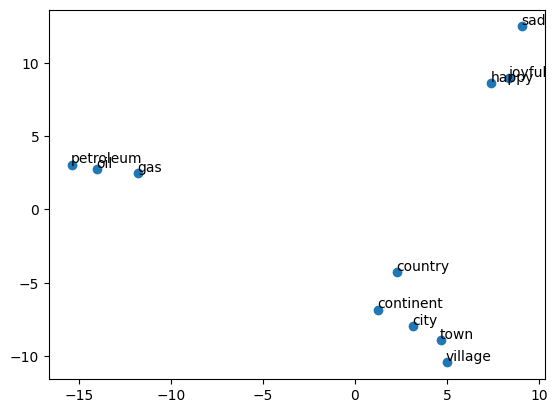

In [16]:
words = ['oil', 'gas', 'happy', 'sad', 'city', 'town',
         'village', 'country', 'continent', 'petroleum', 'joyful']

X = get_vectors(word_embeddings, words)
result = compute_pca(X, 2)
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0] - 0.05, result[i, 1] + 0.1))

plt.show()
